- You start by implementing a PayrollSystem class that processes payroll.
- The PayrollSystem implements a .calculate_payroll() method that takes a collection of employees and prints their id, name, and check amount using the .calculate_payroll() method exposed on each employee object.

In [1]:
# In hr.py

class PayrollSystem:
    def calculate_payroll(self, employees):
        print('Calculating Payroll')
        print('===================')
        for employee in employees:
            print(f'Payroll for: {employee.id} - {employee.name}')
            print(f'- Check amount: {employee.calculate_payroll()}')
            print('')

Now, you implement a base class Employee that handles the common interface for every employee type:

In [2]:
# In hr.py

class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name
        

- The HR system requires that every Employee processed must provide a .calculate_payroll() interface that returns the weekly salary for the employee. The implementation of that interface differs depending on the type of Employee.

- For example, administrative workers have a fixed salary, so every week they get paid the same amount:

In [4]:
# In hr.py

class SalaryEmployee(Employee):
    def __init__(self, id, name, weekly_salary):
        super().__init__(id, name)
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary
    

- The company also employs manufacturing workers that are paid by the hour, so you add an HourlyEmployee to the HR system:

In [5]:
# In hr.py

class HourlyEmployee(Employee):
    def __init__(self, id, name, hours_worked, hour_rate):
        super().__init__(id, name)
        self.hours_worked = hours_worked
        self.hour_rate = hour_rate

    def calculate_payroll(self):
        return self.hours_worked * self.hour_rate

- Finally, the company employs sales associates that are paid through a fixed salary plus a commission based on their sales, so you create a CommissionEmployee class:

In [6]:
# In hr.py

class CommissionEmployee(SalaryEmployee):
    def __init__(self, id, name, weekly_salary, commission):
        super().__init__(id, name, weekly_salary)
        self.commission = commission

    def calculate_payroll(self):
        fixed = super().calculate_payroll()
        return fixed + self.commission

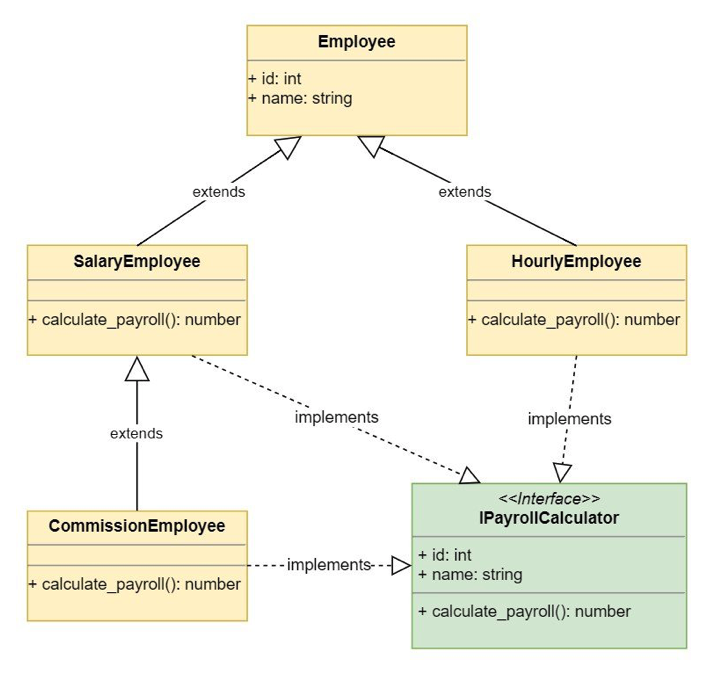

- The diagram shows the inheritance hierarchy of the classes. The derived classes implement the IPayrollCalculator interface, which is required by the PayrollSystem. The PayrollSystem.calculate_payroll() implementation requires that the employee objects passed contain an id, name, and calculate_payroll() implementation.

- Interfaces are represented similarly to classes with the word interface above the interface name. Interface names are usually prefixed with a capital I.

- The application creates its employees and passes them to the payroll system to process payroll:



In [ ]:
# In program.py

import hr

salary_employee = hr.SalaryEmployee(1, 'John Smith', 1500)
hourly_employee = hr.HourlyEmployee(2, 'Jane Doe', 40, 15)
commission_employee = hr.CommissionEmployee(3, 'Kevin Bacon', 1000, 250)
payroll_system = hr.PayrollSystem()
payroll_system.calculate_payroll([
    salary_employee,
    hourly_employee,
    commission_employee
])

The output of `program.py` with the result:

```bash 
$ python program.py

Calculating Payroll
===================
Payroll for: 1 - John Smith
- Check amount: 1500

Payroll for: 2 - Jane Doe
- Check amount: 600

Payroll for: 3 - Kevin Bacon
- Check amount: 1250
```

Notice how the Employee base class doesn’t define a .calculate_payroll() method. This means that if you were to create a plain Employee object and pass it to the PayrollSystem, then you’d get an error. You can try it in the Python interactive interpreter:

```python
import hr
employee = hr.Employee(1, 'Invalid')
payroll_system = hr.PayrollSystem()
payroll_system.calculate_payroll([employee])

Payroll for: 1 - Invalid
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "/hr.py", line 39, in calculate_payroll
    print(f'- Check amount: {employee.calculate_payroll()}')
AttributeError: 'Employee' object has no attribute 'calculate_payroll'
    
```

[SOURCE](https://realpython.com/inheritance-composition-python/)

END.
